# Q learning

In [26]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [33]:
def norm(x):
    return np.sqrt(np.sum(x**2))
class BanditEnv:
    
    
    def __init__(self, n_bandits, prob_dist=None):
        if prob_dist is None:
            prob_dist = np.random.rand(n_bandits)
            self.prob_dist = prob_dist/np.sum(prob_dist)
        else:
            self.prob_dist=prob_dist
        assert np.isclose(np.sum(self.prob_dist), 1.0), np.sum(prob_dist)
        
        self.n_bandits = n_bandits
        self.num_actions = n_bandits
    def step(self, a):
        bandit = np.random.choice(np.arange(self.n_bandits), p=self.prob_dist)
        return None, float(bandit==a), None, None

class RandomMDP:
    pass
    
NUM_ACTIONS = 2
NUM_STATES = 1
env = BanditEnv(NUM_ACTIONS)

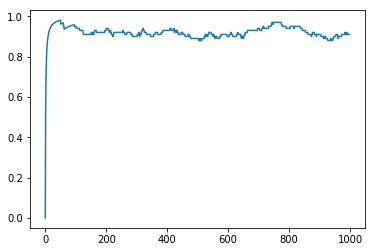

In [76]:
# Q learning
from collections import deque

q_table = np.zeros((NUM_STATES, NUM_ACTIONS), np.float32)-1

rewards = []
rewards_buff = deque(maxlen=100)
epsilon = .1
gamma = .2
lr = 1e-6
NUM_STEPS = 1000
ACTIONS = np.arange(NUM_ACTIONS)
o = 0
for i in range(NUM_STEPS):
    
    if np.random.rand() < epsilon:
        # random action
        a = np.random.choice(ACTIONS)
        _,r,_,_ = env.step(a)
    else:
        a = np.argmax(q_table[o])
        _,r,_,_  = env.step(a)
    
    # Q update
    qt1 = q_table[o,a]
    qt2 = q_table[o, np.argmax(q_table[o])]
    q_table[o, a] = qt1 + lr*(r + qt2 - qt1)
    
    
    
    rewards_buff.append(r)
    rewards.append(np.mean(rewards_buff))

plt.plot(rewards)


In [88]:
env.prob_dist

array([0.96224723, 0.03775277])